In [63]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import precision_recall_fscore_support
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve


In [64]:
my_data=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [65]:
my_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Frequent consumption of high caloric food (FAVC),

Frequency of consumption of vegetables (FCVC),

Number of main meals (NCP),

Consumption of food between meals (CAEC),

Consumption of water daily (CH20),  

Calories consumption monitoring (SCC),   

Physical activity frequency (FAF), 

Time using technology devices (TUE),

Consumption of alcohol (CALC),

In [66]:
my_data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Aucune valeur manquante

In [67]:
my_data['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

Nous pouvons trouver les informations suivantes sur Internet  
•Underweight Less than 18.5

•Normal 18.5 to 24.9

•Overweight 25.0 to 29.9

•Obesity I 30.0 to 34.9

•Obesity II 35.0 to 39.9

•Obesity III Higher than 40

In [68]:
my_data['NObeyesdad'].replace(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'],[0,1,2,3,-1,4,5],inplace=True)

## Analyse de base de datasets

Vérifiez tout d'abord, dans notre dataset, les valeurs sont bien distribué ou pas

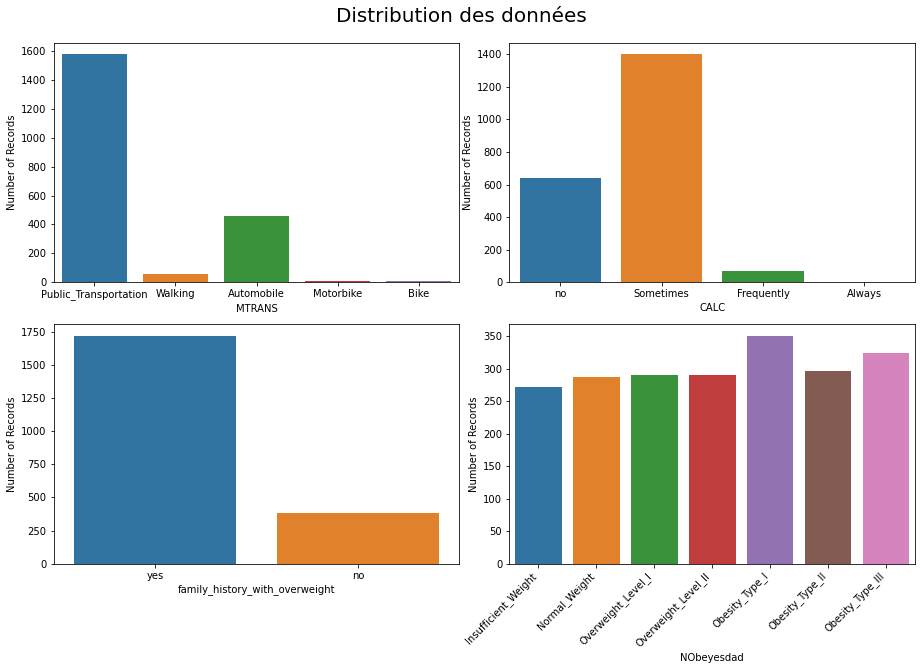

In [46]:
columns = ['MTRANS','CALC','family_history_with_overweight',"NObeyesdad"]
Weight_levels=['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

fig, ax = plt.subplots(2, 2, figsize=(14, 10))
for col, subplot in zip(columns, ax.flatten()):   
    if col=="NObeyesdad":
        sns.countplot(my_data[col],ax=subplot)
        subplot.set_xticklabels(rotation=45,horizontalalignment='right',labels=Weight_levels)  
        subplot.yaxis.label.set_text("Number of Records")
    else:
        sns.countplot(my_data[col],ax=subplot)  
        subplot.yaxis.label.set_text("Number of Records")

fig.suptitle("Distribution des données", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.0, h_pad=1)
plt.show()


On constate que parmi les personnes participant à l'enquête, plus de personnes ont des antécédents familiaux

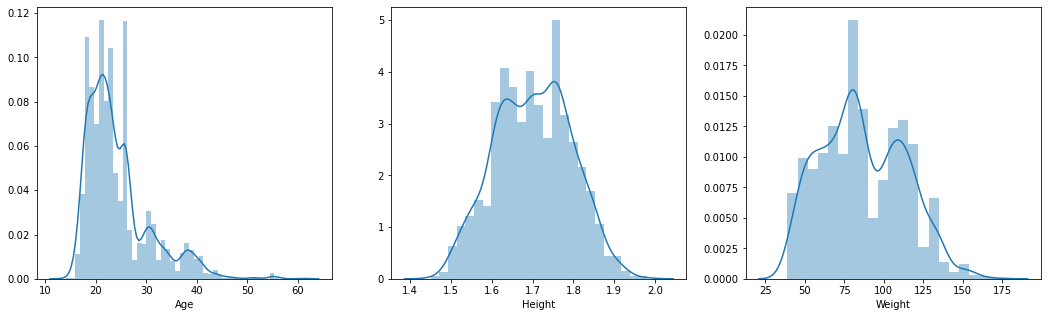

In [47]:
plt.figure(figsize=(18, 5))
plt.subplot(131)
sns.distplot(my_data["Age"], kde=True)
plt.subplot(132)
sns.distplot(my_data["Height"], kde=True)
plt.subplot(133)
sns.distplot(my_data["Weight"], kde=True)

Pour les données numériques, en utilisant le displot, on peut voir que la courbe est conforme à la distribution normale et cela prouve qu'il s'agit de données aléatoires

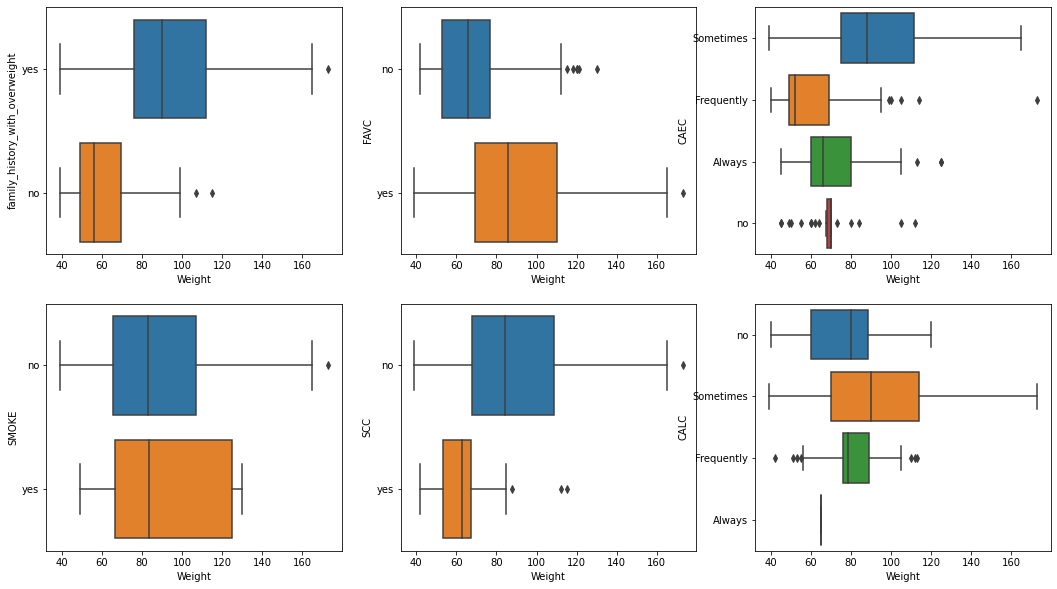

In [48]:
columns = ['family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC']
plt.figure(figsize=(18, 10))
for i in range(len(columns)):
    plt.subplot(231+i)
    sns.boxplot(x = 'Weight', y = columns[i], data = my_data)

Utilisez boxplot pour observer la relation entre certains données et la poids

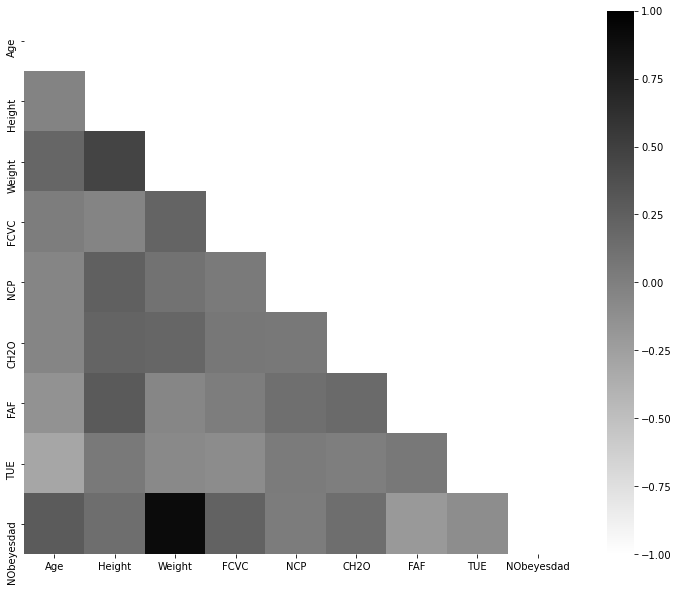

In [12]:
fig = plt.figure(figsize=(14, 10))
matrix = np.triu(my_data.corr())
sns.heatmap(my_data.corr(), 
                 mask=matrix,
                 annot = False,                 
                 fmt='.1g', 
                 cmap="binary", 
                 vmin=-1, vmax=1, center= 0,                 
                 square="True",
                 )

Afficher la corrélation entre les données

## Feather engineering

In [19]:
my_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,...,0,0.0,1.0,0,0,0,0,0,1,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,...,1,3.0,0.0,1,0,0,0,0,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,...,0,2.0,1.0,2,0,0,0,0,1,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,...,0,2.0,0.0,2,1,0,0,0,0,1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,...,0,0.0,0.0,1,2,0,0,0,1,0


In [8]:
my_data['CAEC'].replace(['Sometimes', 'Frequently', 'Always', 'no'],[1,2,3,0],inplace=True)
my_data['CALC'].replace(['Sometimes', 'Frequently', 'Always', 'no'],[1,2,3,0],inplace=True)
my_data['Gender'].replace(['Female', 'Male'],[0,1],inplace=True)
my_data['family_history_with_overweight'].replace(['yes', 'no'],[1,0],inplace=True)
my_data['FAVC'].replace(['yes', 'no'],[1,0],inplace=True)
my_data['SMOKE'].replace(['yes', 'no'],[1,0],inplace=True)
my_data['SCC'].replace(['yes', 'no'],[1,0],inplace=True)

In [9]:
my_data = pd.get_dummies(my_data,columns=["MTRANS"])

Ajustez les données pour les rendre plus adaptées au "train"  
Sometimes, Frequently, Always, no dans CAEC et CALC représente différents niveaux de fréquence, on les transforme en différents nombres  
yes , no :1,0  
dans la colonne MTRANS, comme il représente différents modes de déplacement, on a  utilisé la méthode get_dummies pour les séparer

In [10]:
print(my_data.dtypes)

Gender                              int64
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
NObeyesdad                          int64
MTRANS_Automobile                   uint8
MTRANS_Bike                         uint8
MTRANS_Motorbike                    uint8
MTRANS_Public_Transportation        uint8
MTRANS_Walking                      uint8
dtype: object


L'ensemble de formation est de cette forme

In [11]:
y=my_data["NObeyesdad"]
x=my_data.drop(columns=["NObeyesdad"])

## PCA

In [50]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x_scaled )
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
finalDf = pd.concat([principalDf, y], axis = 1)

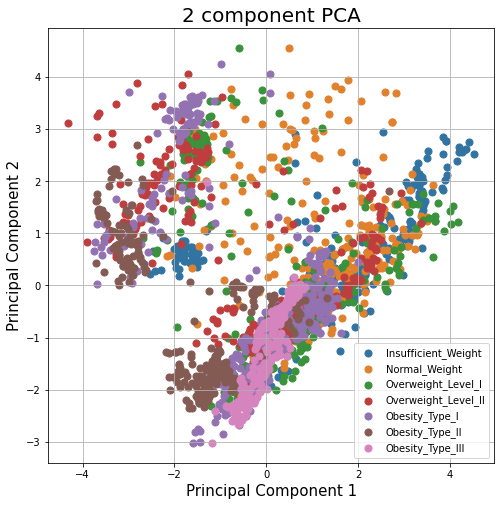

In [77]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
Weight_levels=['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
Weight_levels_num=[i for i in range(-1,6)]
colors=["#3274A1","#E1812C","#3A923A","#C03D3E","#9372B2","#845B53","#D684BD"]
for obeyesdad, color in zip(Weight_levels_num,colors):
    indicesToKeep = finalDf['NObeyesdad'] == obeyesdad
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(Weight_levels)
ax.grid()

J'ai appris pca sur R, et je ne me souviens plus les détail, aides moi s'il te plaît

## Des modeles

In [78]:
x_Train, x_Test, y_Train, y_Test = train_test_split(x,y, test_size=0.2, shuffle=True, stratify=y)

In [79]:
cv = ShuffleSplit(n_splits = 100, test_size = 0.25, random_state = 0)

In [21]:
def applyModel(x_train, y_train,x_test,y_test, model):
    model.fit(x_train, y_train)
    y_pred  = model.predict(x_test)

    precision = precision_score(y_test, y_pred,average='micro') 
    recall = recall_score(y_test, y_pred,average='weighted') 
    f1score = f1_score(y_test, y_pred,average='macro') 
    return ( model,precision, recall, f1score) 

In [15]:
# Random Forest
RFcls = RandomForestClassifier(n_estimators = 10, oob_score = True,max_depth=None)
RFcls, RFprecision, RFrecall, RFf1score=applyModel(x_Train, y_Train,x_Test,y_Test, RFcls)

In [16]:
Priority = pd.DataFrame({'Feature': x_Train.columns,'Importance':np.round(RFcls.feature_importances_,3)})
Priority  = Priority .sort_values('Importance',ascending = False).set_index('Feature')
print(Priority)

                                Importance
Feature                                   
Weight                               0.326
Age                                  0.107
FCVC                                 0.093
Height                               0.086
TUE                                  0.052
NCP                                  0.051
CH2O                                 0.045
FAF                                  0.043
Gender                               0.043
family_history_with_overweight       0.037
CAEC                                 0.030
CALC                                 0.029
FAVC                                 0.016
MTRANS_Public_Transportation         0.016
MTRANS_Automobile                    0.013
SCC                                  0.006
SMOKE                                0.003
MTRANS_Walking                       0.003
MTRANS_Bike                          0.000
MTRANS_Motorbike                     0.000


On voit que l'effet de "Weight" semble trop important

In [22]:
def PrintResults(model, x_Train, y_Train,x_Test,y_Test, title):
    model, precision, recall, f1score = applyModel(x_Train, y_Train,x_Test,y_Test, model)
    
    print("Precision: %.4f %%"%(precision))
    print("Recall: %.4f %%"%(recall))
    print('f1-score: %.4f %%'%(f1score))
    
    Summary = pd.DataFrame({'Model': title, 
                       'Precision': precision, 
                       'Recall': recall, 
                       'F1-Score': f1score}, index = [0])
    return (model, Summary)

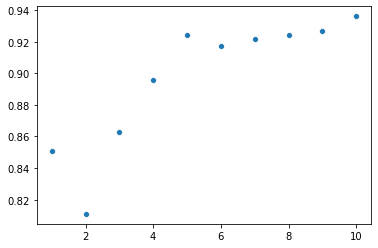

In [39]:
precision_List=[]
for i in range(1,11):
    model = RandomForestClassifier(n_estimators = i, oob_score = True,max_depth=None, random_state=2021)
    model, precision, recall, f1score = applyModel(x_Train, y_Train,x_Test,y_Test, model)
    precision_List.append(precision)
sns.scatterplot(x=range(1,11),y=precision_List)

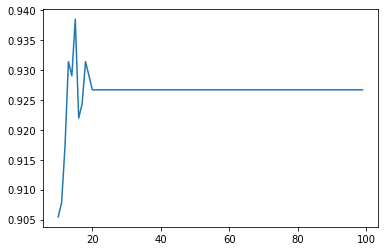

In [40]:
precision_List=[]
for i in range(10,100):
    model = RandomForestClassifier(n_estimators = 9, oob_score = True,max_depth=i, random_state=2021)
    model, precision, recall, f1score = applyModel(x_Train, y_Train,x_Test,y_Test, model)
    precision_List.append(precision)
sns.lineplot(x=range(10,100),y=precision_List)

In [105]:
from sklearn.tree import DecisionTreeClassifier
DTclf=DecisionTreeClassifier()
DTclf, Summary_DT=PrintResults(DTclf, x_Train, y_Train,x_Test,y_Test, "DecisionTree")

Precision: 0.9291 %
Recall: 0.9291 %
f1-score: 0.9276 %


In [91]:
from sklearn import svm
SVMclf = svm.SVC()
SVMclf, Summary_SVM=PrintResults(SVMclf, x_Train, y_Train,x_Test,y_Test, "SVM")

Precision: 0.5981 %
Recall: 0.5981 %
f1-score: 0.5957 %


In [106]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR, Summary_LR = PrintResults(LR, x_Train, y_Train,x_Test,y_Test, "LogisticRegression")

Precision: 0.6927 %
Recall: 0.6927 %
f1-score: 0.6869 %


In [107]:
from sklearn.linear_model import SGDClassifier
SGDclf = SGDClassifier(max_iter = 300, tol = None)
SGDclf, Summary_SGD = PrintResults(SGDclf, x_Train, y_Train,x_Test,y_Test, "SGD")

Precision: 0.6596 %
Recall: 0.6596 %
f1-score: 0.6289 %


In [98]:
from sklearn.neighbors import KNeighborsClassifier

for n in range(2,12):
    KNNclf=KNeighborsClassifier(n_neighbors = n)
    KNNclf.fit(x_Train, y_Train)
    y_pred=KNNclf.predict(x_Test)
    
    precision = precision_score(y_Test, y_pred,average='micro') 
    print("%.d Neighbors & Precision: %.2f %%"%(n,precision))
    

2 Neighbors & Precision: 0.89 %
3 Neighbors & Precision: 0.89 %
4 Neighbors & Precision: 0.88 %
5 Neighbors & Precision: 0.87 %
6 Neighbors & Precision: 0.87 %
7 Neighbors & Precision: 0.86 %
8 Neighbors & Precision: 0.86 %
9 Neighbors & Precision: 0.85 %
10 Neighbors & Precision: 0.84 %
11 Neighbors & Precision: 0.83 %


In [99]:
KNNclf=KNeighborsClassifier(n_neighbors = 3)
KNNclf, Summary_KNN = PrintResults(KNNclf, x_Train, y_Train,x_Test,y_Test, "KNN")

Precision: 0.8889 %
Recall: 0.8889 %
f1-score: 0.8810 %


In [109]:
Class_Results = pd.concat([ Summary_RF, Summary_DT, Summary_SVM, 
                           Summary_LR, Summary_SGD ,  Summary_KNN], ignore_index = True)
    
Class_Results = Class_Results.sort_values(by = 'Precision', ascending=False)
Class_Results = Class_Results.set_index('Precision')
Class_Results

,Model,Recall,F1-Score
Precision,,,
0.929078,DecisionTree,0.929078,0.927559
0.921986,RandomForest,0.921986,0.919579
0.888889,KNN,0.888889,0.880976
0.692671,LogisticRegression,0.692671,0.686930
0.659574,SGD,0.659574,0.628896
0.598109,SVM,0.598109,0.595705


## Réseaux de neurones

In [84]:
x_Train.shape

(1688, 20)

In [87]:
len(y_Train.unique())

7

In [92]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold

In [108]:
def build_model():
    model = Sequential()
    model.add(Dense(16, input_dim = 20, activation = 'relu'))
    model.add(Dense(16, activation = 'tanh'))
    model.add(Dense(7, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
    return model

In [109]:
estimator = KerasClassifier(build_fn = build_model, epochs = 100, batch_size = 10, verbose = 0)

In [110]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 2021)
results = cross_val_score(estimator, x_Train, y_Train, cv = kfold)

In [111]:
print(results)

[0.80177516 0.84023666 0.87869823 0.81305641 0.76557863]
